In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choice

In [2]:
data = np.genfromtxt('tic-tac-toe.data', delimiter=',', dtype='U30')
print(data[:10])

[['x' 'x' 'x' 'x' 'o' 'o' 'x' 'o' 'o' 'positive']
 ['x' 'x' 'x' 'x' 'o' 'o' 'o' 'x' 'o' 'positive']
 ['x' 'x' 'x' 'x' 'o' 'o' 'o' 'o' 'x' 'positive']
 ['x' 'x' 'x' 'x' 'o' 'o' 'o' 'b' 'b' 'positive']
 ['x' 'x' 'x' 'x' 'o' 'o' 'b' 'o' 'b' 'positive']
 ['x' 'x' 'x' 'x' 'o' 'o' 'b' 'b' 'o' 'positive']
 ['x' 'x' 'x' 'x' 'o' 'b' 'o' 'o' 'b' 'positive']
 ['x' 'x' 'x' 'x' 'o' 'b' 'o' 'b' 'o' 'positive']
 ['x' 'x' 'x' 'x' 'o' 'b' 'b' 'o' 'o' 'positive']
 ['x' 'x' 'x' 'x' 'b' 'o' 'o' 'o' 'b' 'positive']]


In [3]:
print(f'Data type: {type(data)}')
print(f'Data[0] type: {type(data[0])}')
print(f'Data[0][0] type: {type(data[0][0])}')
print(f'Data shape: {data.shape}')

Data type: <class 'numpy.ndarray'>
Data[0] type: <class 'numpy.ndarray'>
Data[0][0] type: <class 'numpy.str_'>
Data shape: (958, 10)


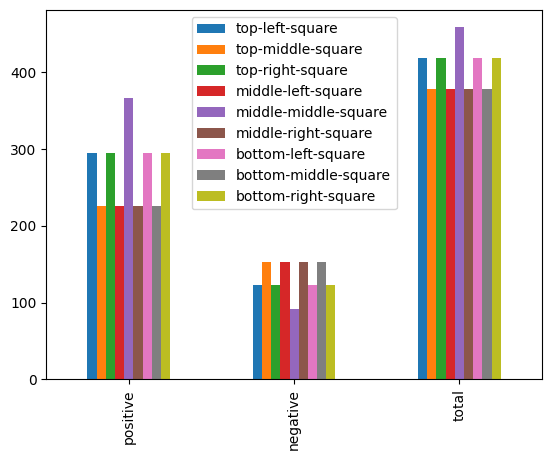

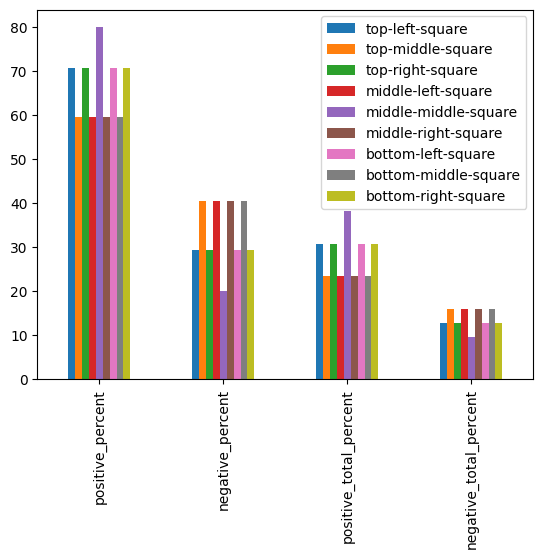

In [4]:
cells = [
	'top-left-square', 'top-middle-square', 'top-right-square',
	'middle-left-square', 'middle-middle-square', 'middle-right-square',
	'bottom-left-square', 'bottom-middle-square', 'bottom-right-square',
]
results_dict = {cell: {'positive': 0, 'negative': 0, 'total': 0} for cell in cells}
games_count = len(data)
for game in data:
	result = game[9]
	for index in range(9):
		value = game[index]
		if value == 'x':
			results_dict[cells[index]]['total'] += 1
			results_dict[cells[index]][result] += 1

results_percents_dict = {}
for cell, results in results_dict.items():
	results_percents_dict.update({
		cell: {
			'positive_percent': results['positive'] / results['total'] * 100,
			'negative_percent': results['negative'] / results['total'] * 100,
			'positive_total_percent': results['positive'] / games_count * 100,
			'negative_total_percent': results['negative'] / games_count * 100,
		}
	})
	
df = pd.DataFrame(results_dict)
df.plot(kind='bar')
df = pd.DataFrame(results_percents_dict)
df.plot(kind='bar')
plt.show()


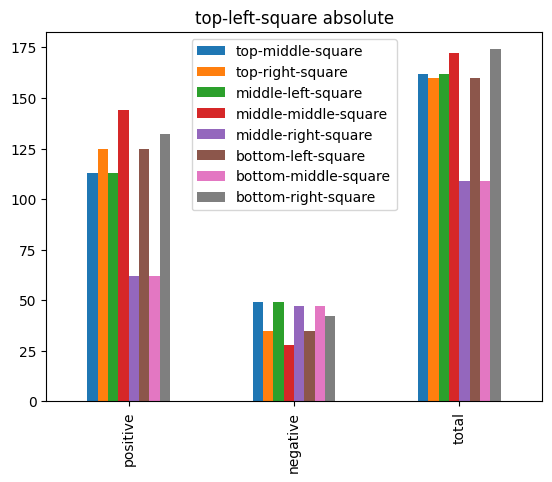

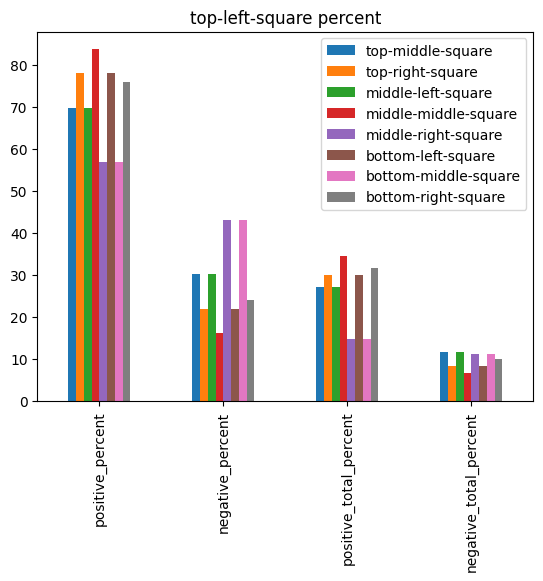

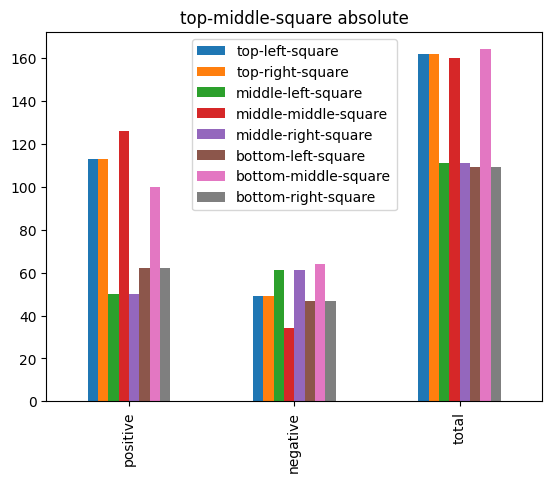

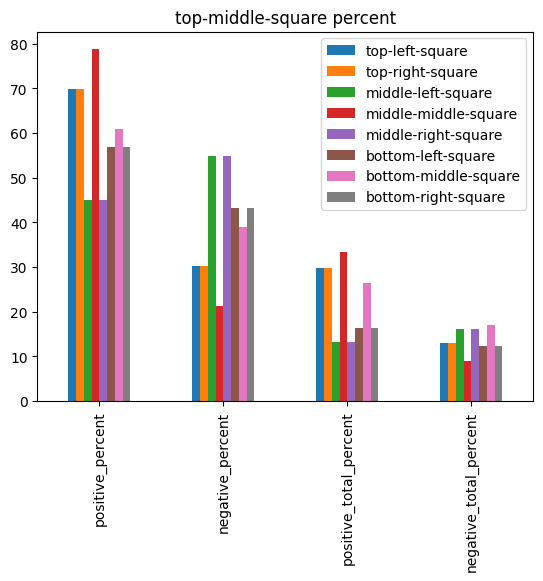

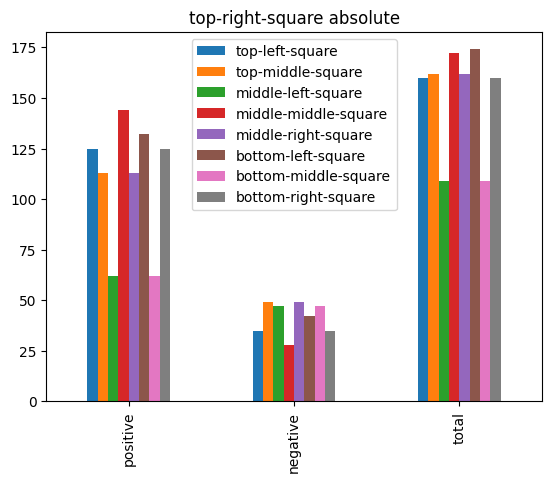

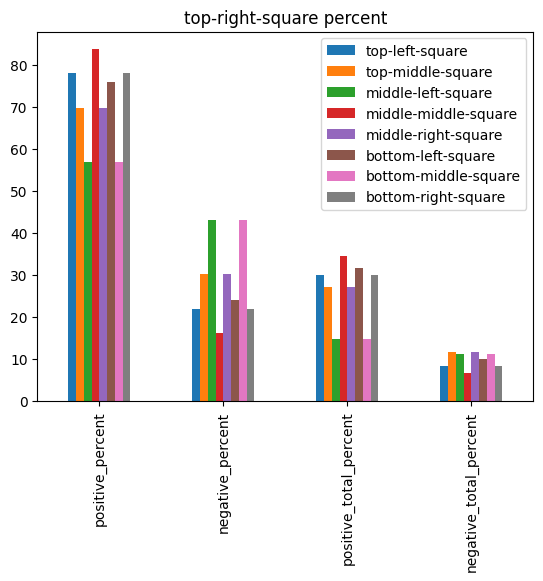

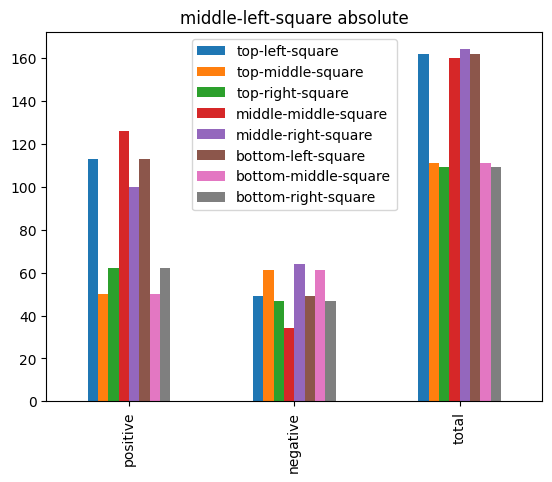

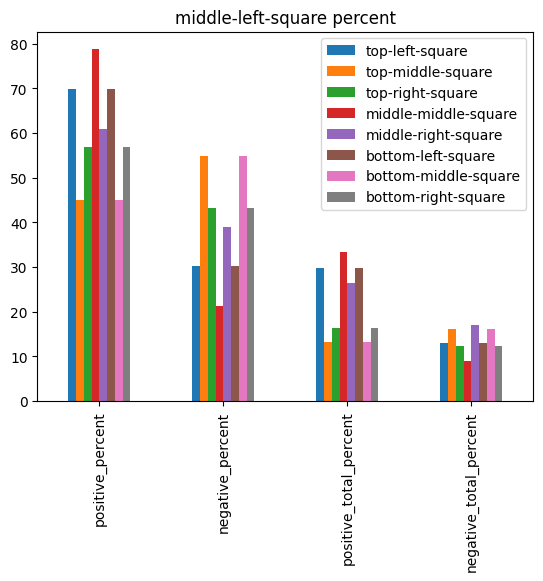

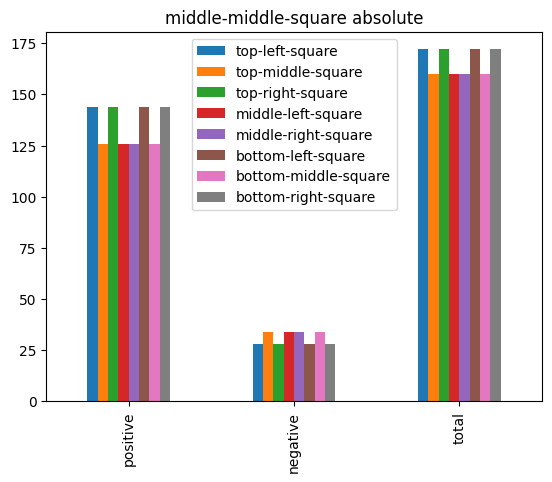

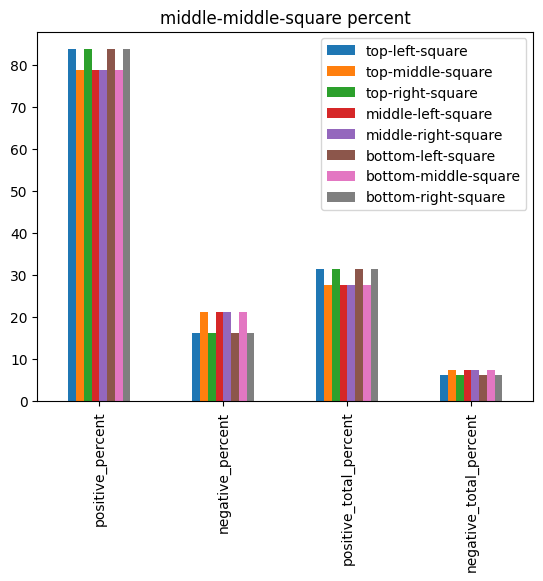

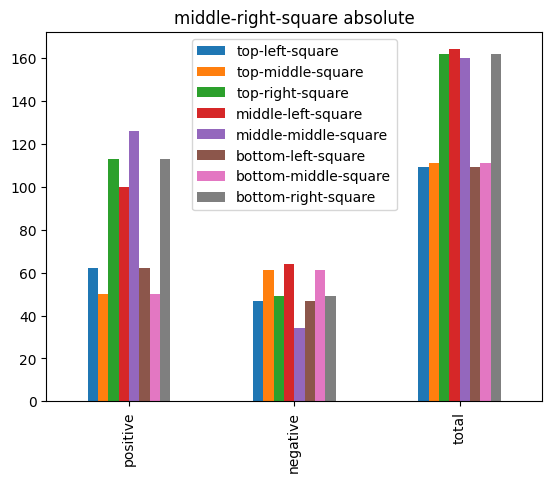

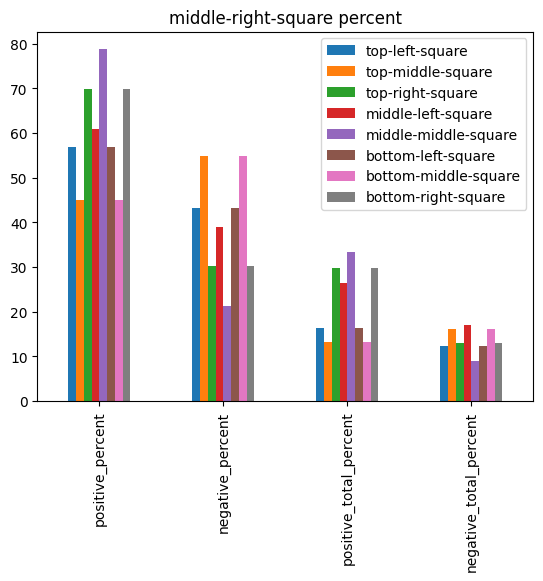

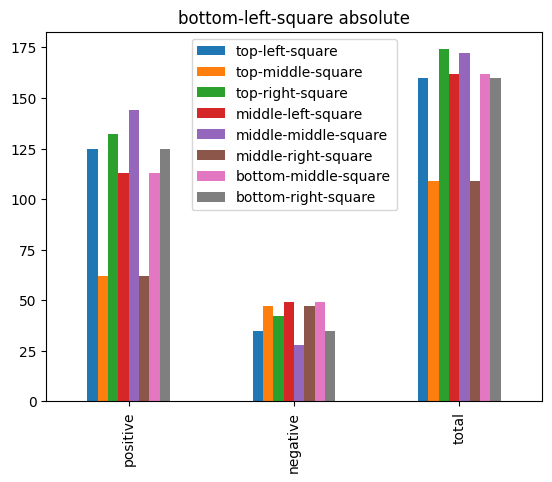

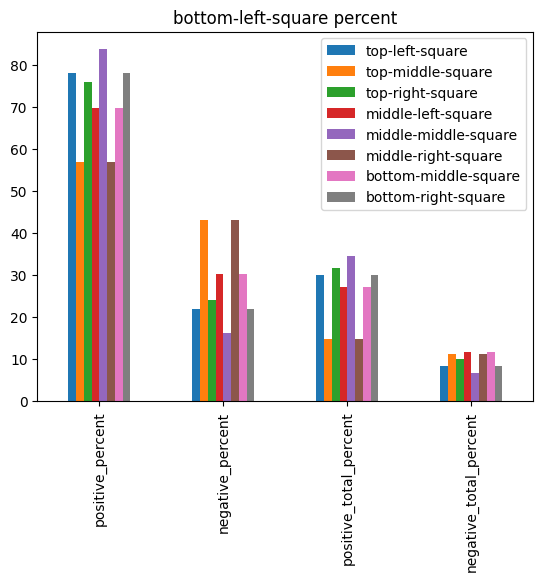

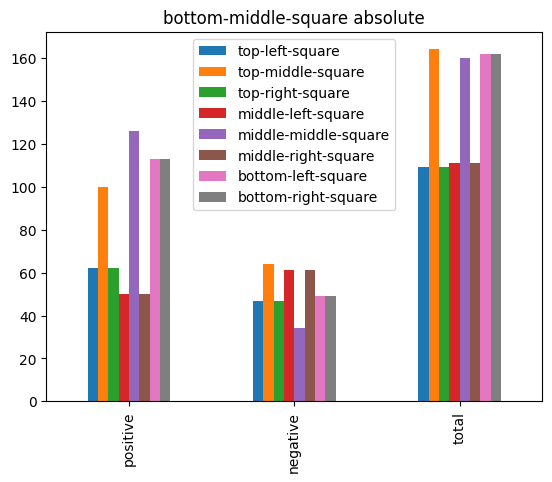

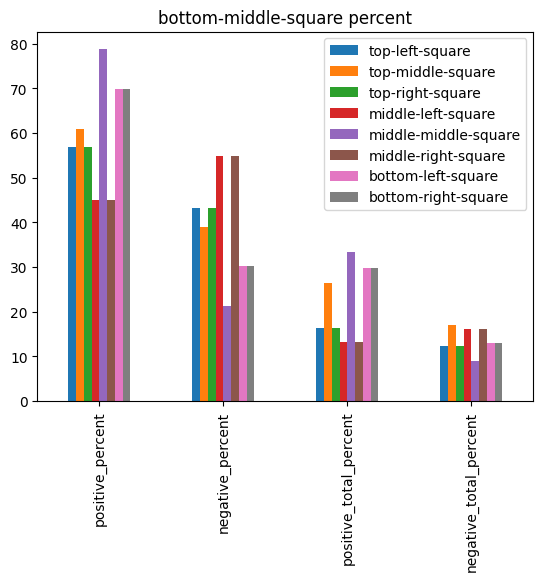

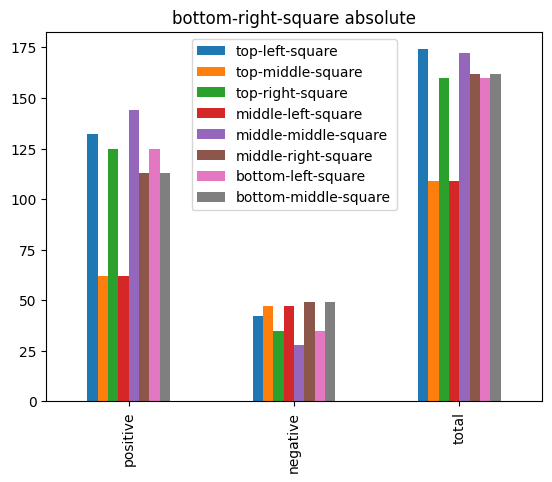

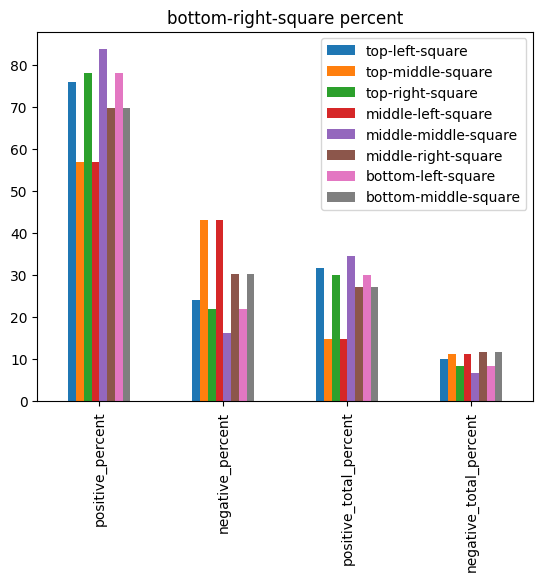

In [5]:
second_move_results = {}

for first_cell in cells:
	results_dict = {
		cell: {'positive': 0, 'negative': 0, 'total': 0} 
		for cell in cells if cell != first_cell
	}

	games_count = 0
	first_cell_index = cells.index(first_cell)
	for game in data:
		if game[first_cell_index] != 'x':
			continue
		games_count += 1
		result = game[9]
		for index in range(9):
			if index == first_cell_index:
				continue
			value = game[index]
			if value == 'x':
				results_dict[cells[index]]['total'] += 1
				results_dict[cells[index]][result] += 1
	

	results_percents_dict = {}
	for cell, results in results_dict.items():
		results_percents_dict.update({
			cell: {
				'positive_percent': results['positive'] / results['total'] * 100,
				'negative_percent': results['negative'] / results['total'] * 100,
				'positive_total_percent': results['positive'] / games_count * 100,
				'negative_total_percent': results['negative'] / games_count * 100,
			}
		})
	df = pd.DataFrame(results_dict)
	df.plot(kind='bar', title=f'{first_cell} absolute')
	df = pd.DataFrame(results_percents_dict)
	df.plot(kind='bar', title=f'{first_cell} percent')
plt.show()

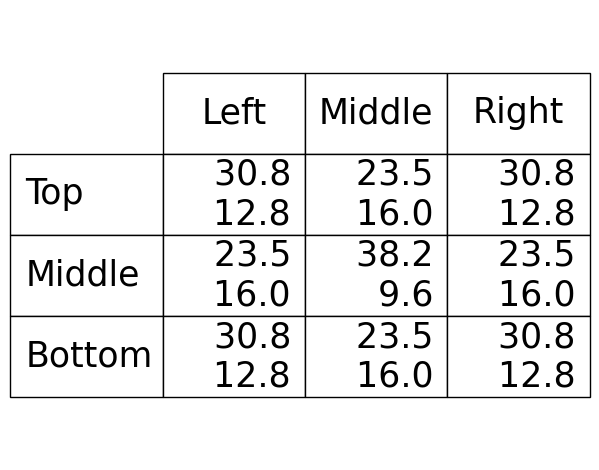

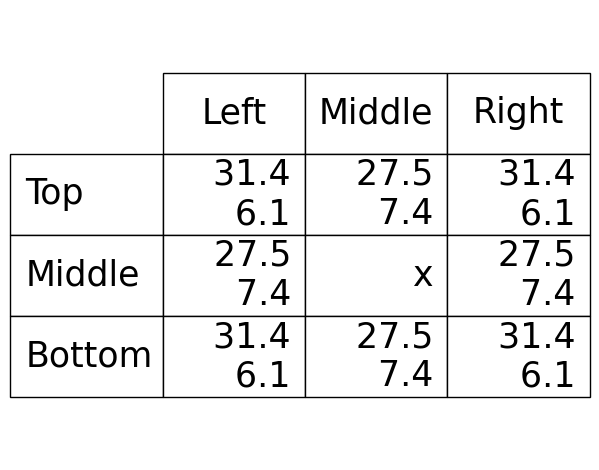

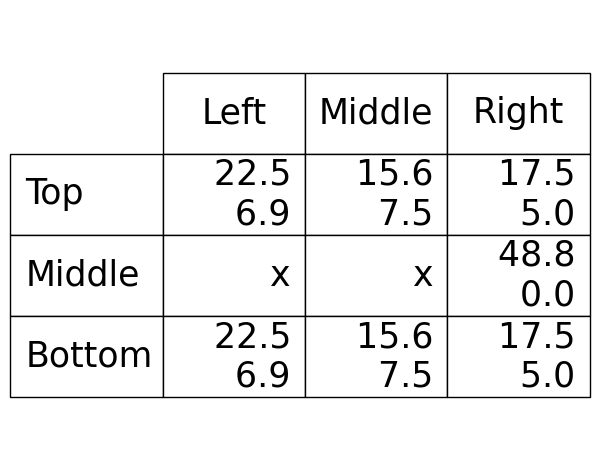

ValueError: invalid literal for int() with base 10: ''

In [10]:
def get_rates(owned_cells=[]):
	results_dict = {
		cell: {'positive': 0, 'negative': 0, 'total': 0} 
		for cell in cells 
		if cell not in owned_cells
	}
	games_count = 0
	for game in data:
		valid = True
		for index in owned_cells:
			if game[index] != 'x':
				valid = False
				break
		if not valid:
			continue
		games_count += 1
		result = game[9]
		for cell in results_dict:
			index = cells.index(cell)
			value = game[index]
			if value == 'x':
				results_dict[cell]['total'] += 1
				results_dict[cell][result] += 1
	
	result = []
	for row in range(3):
		result.append([0, 0, 0])
		for col in range(3):
			index = row * 3 + col
			cell = cells[index]
			if index in owned_cells:
				result[row][col] = 'x'
				continue
			positive = results_dict[cell]['positive'] / games_count * 100
			negative = results_dict[cell]['negative'] / games_count * 100
			
			result[row][col] = f'{positive: .1f}\n{negative: .1f}'
	return result
		
owned_cells = []
while True:
	rates = get_rates(owned_cells)
	fig, ax = plt.subplots()
	#hide the axes
	fig.patch.set_visible(False)
	ax.axis('off')
	ax.axis('tight')

	#create data
	df = pd.DataFrame(rates)

	#create table
	table = ax.table(
		cellText=df.values, colLabels=['Left', 'Middle', 'Right'], 
		rowLabels=['Top', 'Middle', 'Bottom'], loc='center'
	)
	table.set_fontsize(30)
	table.scale(1, 4)

	#display table
	fig. tight_layout ()
	plt.show() 
	row_index = int(input('Введите строку: '))
	col_index = int(input('Введите столбец: '))
	owned_cells.append(row_index * 3 + col_index)

In [7]:
class Game_AI:
	def __init__(self):
		self.owned_cells = []
		
	def make_move(self, opponent_cells):
		rates = self.get_rates(opponent_cells)
		max_rate = max([max(row) for row in rates])
		print(max_rate)
		if max_rate == 0:
			return []
		moves = []
		for row in range(3):
			for col in range(3):
				if rates[row][col] == max_rate:
					moves.append((row, col))
		return moves

	def get_rates(self, opponent_cells):
		counters = [
			[0, 0, 0],
			[0, 0, 0],
			[0, 0, 0],
		]
		games_count = 0
		for game in data:
			valid = True
			for index in self.owned_cells:
				if game[index] != 'x':
					valid = False
					break
			for index in opponent_cells:
				if game[index] != 'o':
					valid = False
					break
			if not valid:
				continue
			games_count += 1
			if (game[9]):
				for row in range(3):
					for col in range(3):
						index = row * 3 + col
						if index in {*self.owned_cells, *opponent_cells}:
							continue
						if game[index] == 'x':
							counters[row][col] += 1
		if games_count == 0:
			return counters
		for row in range(3):
			for col in range(3):
				counters[row][col] /= games_count / 100
		return counters

In [8]:
class Game_Player:
	def __init__(self):
		self.owned_cells = []
	def make_move(self, opponent_cells):
		while True:
			row_index = int(input('Введите строку: '))
			col_index = int(input('Введите столбец: '))
			if row_index * 3 + col_index not in opponent_cells:
				return [
					(row_index, col_index)
				]

In [11]:
class Game:
	def __init__(self):
		self.first = Game_AI()
		self.second = Game_AI()
		self.game_map = None
		self.game_over = True

	def play(self):
		self.game_map = [
			['', '', ''],
			['', '', ''],
			['', '', ''],
		]
		self.game_over = False
		while True:
			self.make_move(self.first)
			if self.game_over:
				break
			self.make_move(self.second)
			if self.game_over:
				break

	def make_move(self, ai):
		figure = 'x' if ai == self.first else 'o'
		other_ai = self.second if ai == self.first else self.first
		moves = ai.make_move(other_ai.owned_cells)
		if len(moves) == 0:
			self.game_over = True
			return
		
		row, col = choice(moves)
		self.game_map[row][col] = figure
		ai.owned_cells.append(row * 3 + col)
		self.draw_game_map(row, col, figure)

	def draw_game_map(self, row, col, figure):
		fig, ax = plt.subplots()
		#hide the axes
		fig.patch.set_visible(False)
		ax.axis('off')
		ax.axis('tight')

		#create data
		df = pd.DataFrame(self.game_map)

		#create table
		table = ax.table(
			cellText=df.values, colLabels=['Left', 'Middle', 'Right'], 
			rowLabels=['Top', 'Middle', 'Bottom'], loc='center'
		)
		table.set_fontsize(30)
		table.scale(1, 4)

		#display table
		fig.tight_layout()
		print(f'set {figure} [{row},{col}]')
		plt.show() 

47.80793319415449
set x [1,1]


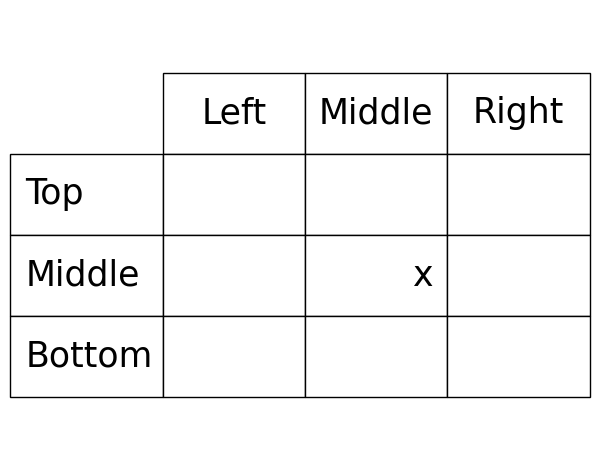

49.411764705882355
set o [2,0]


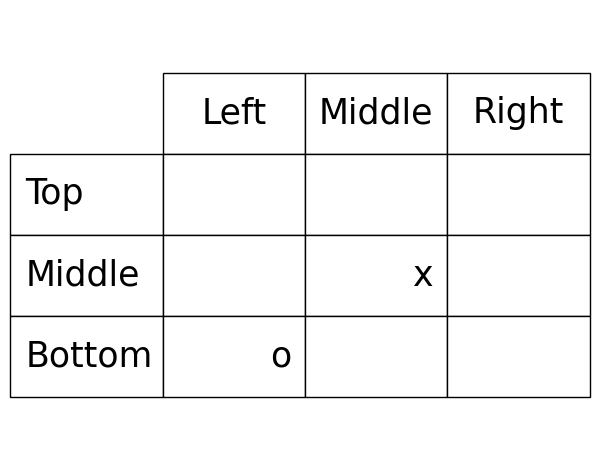

45.50561797752809
set x [0,1]


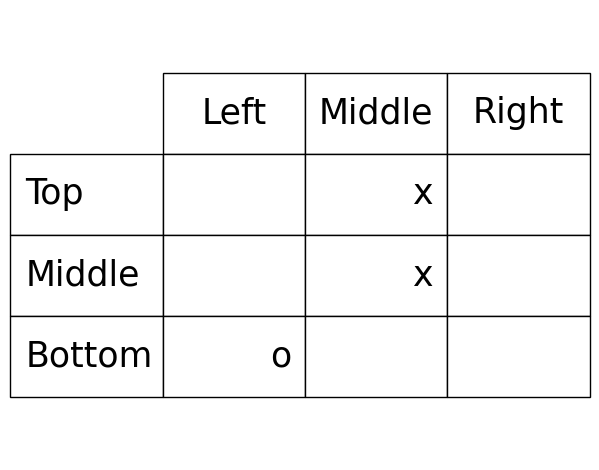

57.37704918032787
set o [2,2]


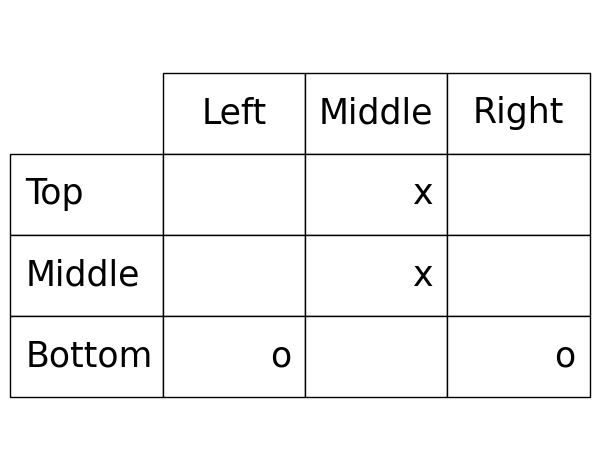

48.57142857142858
set x [2,1]


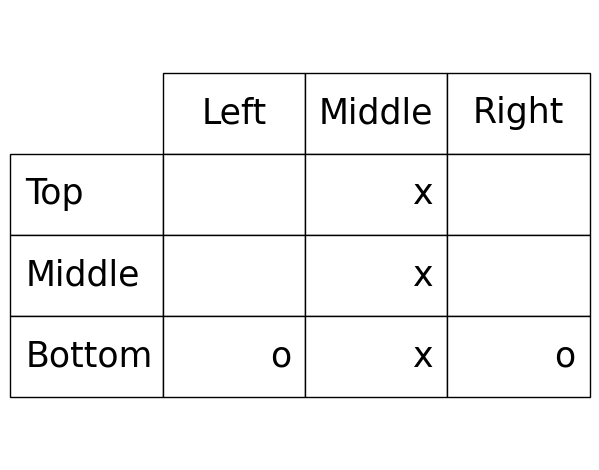

41.66666666666667
set o [0,2]


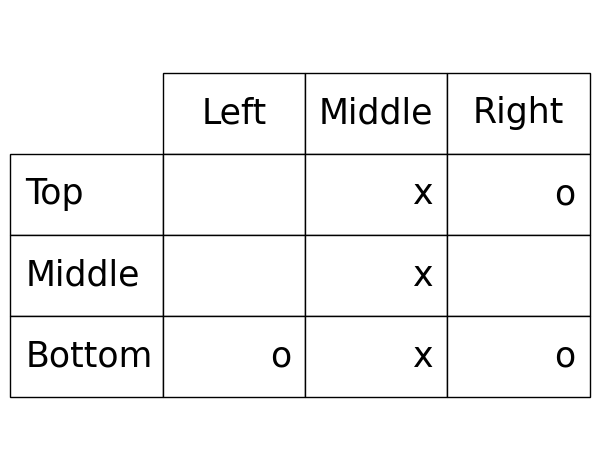

60.0
set x [1,2]


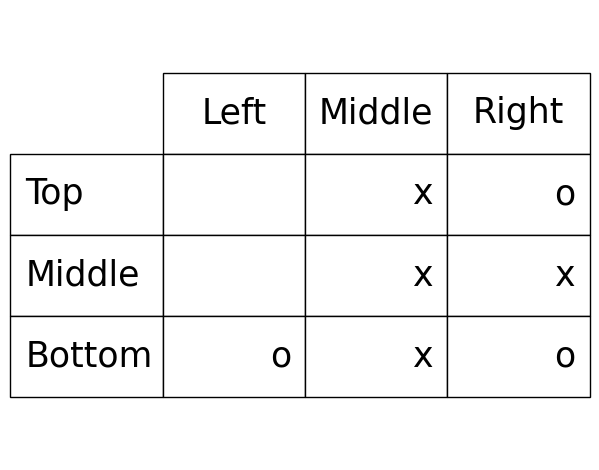

50.0
set o [1,0]


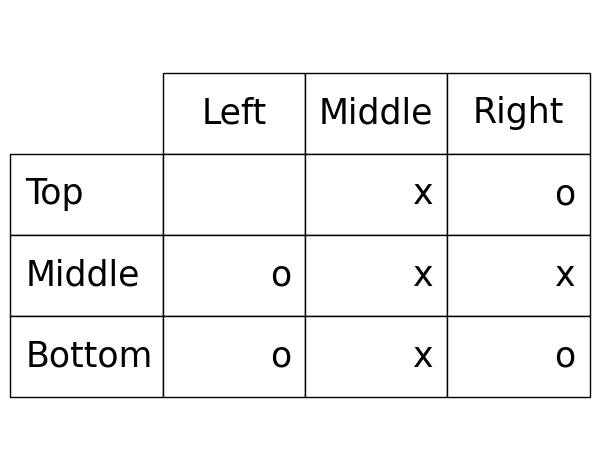

100.0
set x [0,0]


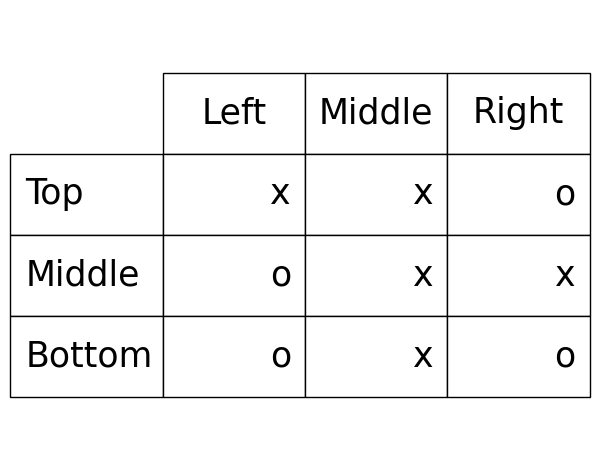

0


In [12]:
game = Game()
game.play()